**k-NN for MNIST Classification**


https://www.back-prop.com/deep_learning/knn/mnist/2019/05/16/knn_classifier/

https://www.back-prop.com/deep_learning/inceptionv3/tf_flowers/feature_extraction/fine_tuning/google_colab/2019/05/17/InceptionV3_TFFLOWERS/

In [1]:
import numpy as np
import pandas as pd
import pprint
from sklearn.datasets import load_digits
from IPython.display import display, HTML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

# Standard scientific Python imports
import matplotlib.pyplot as plt

mnist = load_digits()
print(mnist.data.shape)

(1797, 64)


In [0]:
# split training : testing dataset = 0.75 : 0.25
trainData,testData,trainLabel,testLabel, trainImage, testImage = train_test_split(np.array(mnist.data),mnist.target, mnist.images, test_size=0.25,random_state=42)

In [3]:
# split valuate dataset from training dataset
trainData,valData,trainLabel,valLabel, trainImage, valImage = train_test_split(trainData,trainLabel, trainImage, test_size=0.1,random_state=84)

print("training data points: {}".format(len(trainLabel)))
print("validation data points: {}".format(len(valLabel)))
print("testing data points: {}".format(len(testLabel)))

training data points: 1212
validation data points: 135
testing data points: 450


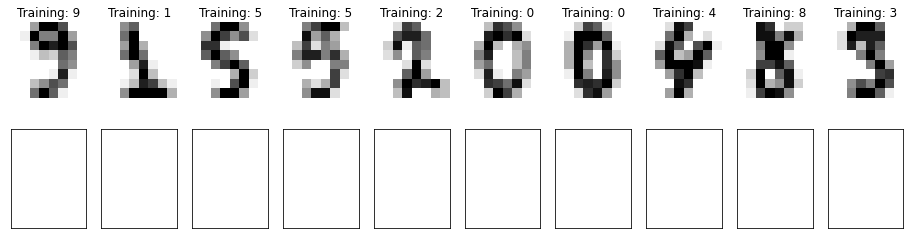

In [4]:
# plot training dataset -- 10 sample file image 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(16, 4),
                        subplot_kw={'xticks': [], 'yticks': []})
images_and_labels = list(zip(trainImage, trainLabel))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
n_samples = len(mnist.images)

In [5]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
# build k-NN model 

kVals = np.arange(1,30,2)

for k in kVals:
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData,trainLabel)
    
    # evaluate the model and update the accuracies list
    score = model.score(valData, valLabel)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))


k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%


In [7]:
# Predict Model k = 1 

model = KNeighborsClassifier(n_neighbors=1)
model.fit(trainData,trainLabel)
predictions = model.predict(testData)

print(classification_report(testLabel,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



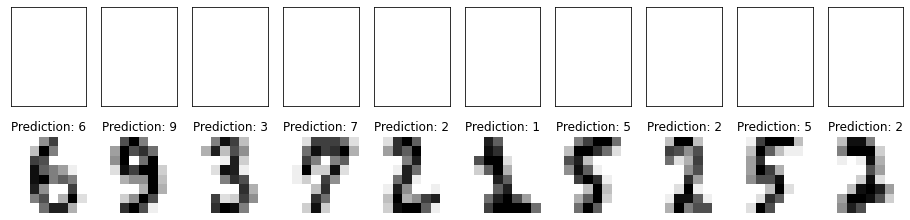

In [8]:
# plot test result 10 sample image file

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(16, 4),
                        subplot_kw={'xticks': [], 'yticks': []})

images_and_predictions = list(zip(testImage, predictions))

for ax, (image, label) in zip(axes[1, :], images_and_predictions[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % label)


Confusion matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  1  1  1  0  0  0 45]]


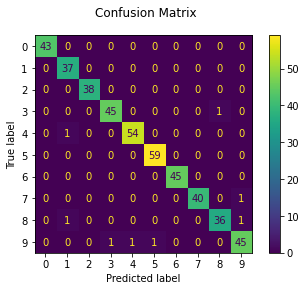

In [9]:
#print("Classification report for classifier %s:\n%s\n"
#      % (predictions, classification_report(testData, predictions)))

# print & plot Confusion matrix

disp = plot_confusion_matrix(model, testData, testLabel)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()